# Plotting Scalability Graphs

**Objetivo:** Fazer gráficos de escalabilidade forte e fraca com os dados coletados.

## Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Processing Data

In [6]:
n = [1500, 2000, 2500, 3000, 3500]
nt = [1, 2, 3, 4, 5, 6]

data = {}

data['runtime'] = []
data['problem_size'] = []
data['number_threads'] = []

for n_val in n:
    for nt_val in nt:
        with open(f'./data/weak_scalability/weak_scalability_graph_data_n={n_val}_nt={nt_val}.txt', 'r') as file:
                file_data = file.readlines()
                for i in range(0, 10):
                    line = file_data[10*i + 7]
                    # print(line.split()[3])
                    data['runtime'].append(line.split()[3])
                    data['problem_size'].append(n_val)
                    data['number_threads'].append(nt_val)

## Computing Statistics

In [32]:
df = pd.DataFrame(data, columns=data.keys())

df['runtime'] = df['runtime'].astype(np.float64)

for column in ['problem_size', 'number_threads']:
    df[column] = df[column].astype(int)

# Calculando a média de x para cada combinação de y e z
mean_df = df.groupby(['problem_size', 'number_threads'])['runtime'].mean().reset_index()
mean_df.columns = ['problem_size', 'number_threads', 'mean_runtime']

print(mean_df)

    problem_size  number_threads  mean_runtime
0           1500               1     54.008198
1           1500               2     27.740382
2           1500               3     19.313565
3           1500               4     14.746067
4           1500               5     12.143138
5           1500               6     10.135961
6           2000               1    124.492307
7           2000               2     64.751488
8           2000               3     44.224143
9           2000               4     34.232077
10          2000               5     29.181849
11          2000               6     24.322650
12          2500               1    275.874478
13          2500               2    145.951875
14          2500               3     98.686345
15          2500               4     76.618165
16          2500               5     63.067614
17          2500               6     53.102264
18          3000               1    440.641157
19          3000               2    233.913221
20          3

## Plotting

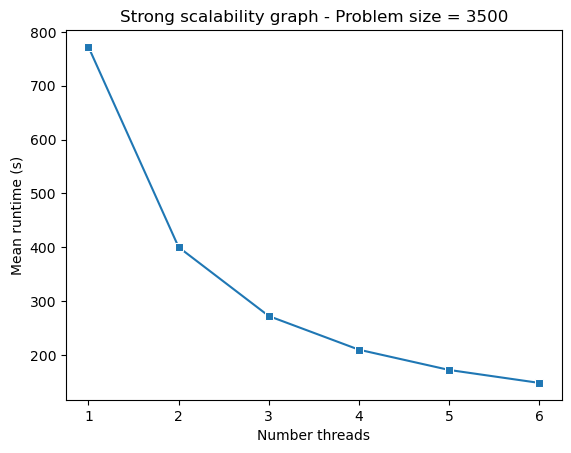

In [44]:
strong_scalability_data = mean_df[mean_df['problem_size'] == 3500]

sns.lineplot(x='number_threads', y='mean_runtime', marker='s', data=strong_scalability_data)

plt.xlabel("Number threads")
plt.ylabel("Mean runtime (s)")
plt.title("Strong scalability graph - Problem size = 3500")

plt.savefig("Strong scalability graph")

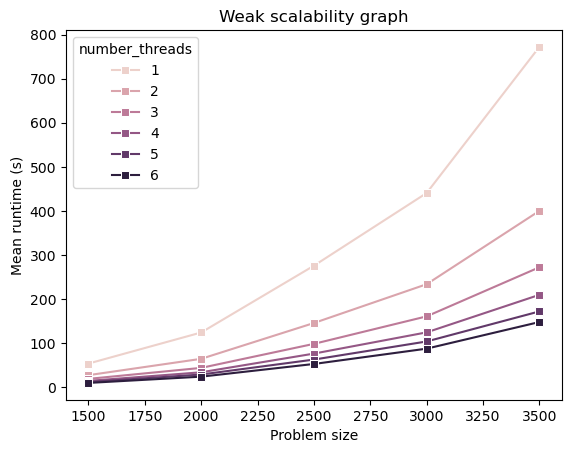

In [45]:
sns.lineplot(x='problem_size', y='mean_runtime', hue='number_threads', marker='s', data=mean_df)

plt.xlabel("Problem size")
plt.ylabel("Mean runtime (s)")
plt.title("Weak scalability graph")

plt.savefig("Weak scalability graph")